# Integrating Rate Gyro Data
The **yaw rate** of a vehicle can be measured by a **rate gyro**. 

The yaw rate gives the rate of change of the vehicle's heading in radians per second and since a vehicle's heading is usually given by the greek letter $\theta$ (theta), yaw **rate** is given by $\dot{\theta}$ (theta dot).

Integrating the yaw rate gives total change in heading. 

In [9]:
import helpers
from helpers import process_data, get_derivative_from_data
from matplotlib import pyplot as plt

PARALLEL_PARK_DATA = process_data("parallel_park.pickle")

TIMESTAMPS    = [row[0] for row in PARALLEL_PARK_DATA]
DISPLACEMENTS = [row[1] for row in PARALLEL_PARK_DATA]
YAW_RATES     = [row[2] for row in PARALLEL_PARK_DATA]
ACCELERATIONS = [row[3] for row in PARALLEL_PARK_DATA]

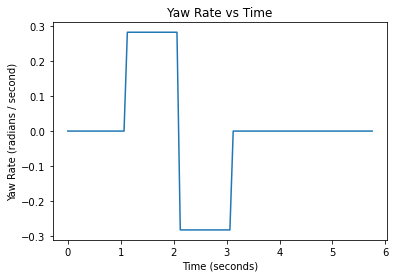

In [3]:
plt.title("Yaw Rate vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Yaw Rate (radians / second)")
plt.plot(TIMESTAMPS, YAW_RATES)
plt.show()

Here's what I make of this data

**From t=0 to t=1**: The yaw rate is zero so the wheels are straight (or the car isn't moving). This is when the car is backing up straight.

**From t=1 to t=2**: This is where the driver cuts the steering wheel hard to the right and keeps backing up. Since the yaw rate is non-zero, this means the vehicle is turning.

**From t=2 to t=3**: This is where the driver cuts the wheel back to the left to straighten out. 

**After t=3**: Here the vehicle isn't turning so it's probably just adjusting its position within the spot by driving forward and/or backward slowly.

### Your job
In this notebook you will write the `get_integral_from_data` function yourself and then use that function to keep track of a vehicle's heading as it drives. 

First, take a look at what the integrated rate gyro data should look like when you get your function working correctly

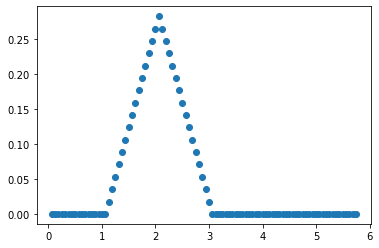

In [6]:
from helpers import get_integral_from_data as solution_integral

thetas = solution_integral(YAW_RATES, TIMESTAMPS)

plt.scatter(TIMESTAMPS[1:], thetas)
plt.show()

As you can see, the vehicle's heading is initially $\theta = 0 \text{ radians}$. From $t=1$ to $t=2$ the heading increases to a maximum of about $0.28 \text{ radians}$ (which is about 16 degrees). 

In [12]:
def get_integral_from_data(data, times):
    # TODO - write integration code!
    return solution_integral(data, times)

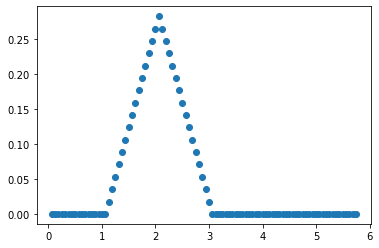

In [13]:
# Visual Testing - Compare the result of your 
# integration code to the plot above

thetas = get_integral_from_data(YAW_RATES, TIMESTAMPS)

plt.scatter(TIMESTAMPS[1:], thetas)
plt.show()